In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request

%matplotlib inline

In [2]:
# urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

In [3]:
open('stations.txt', 'r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [4]:
stations = {}

for line in open('stations.txt', 'r'):
    if 'GSN' in line:
        fields = line.split()
        
        stations[fields[0]] = ' '.join(fields[4:])
        
        
        

In [5]:
len(stations)

997

In [6]:
def find_station(s):
    found = {code: name for code,name in stations.items() if s in name}
    print(found)


In [7]:
find_station('NAIROBI/DAGORETTI')

{}


In [8]:
datastations = ['KE000063612','KE000063661',
                'KE000063820', 'KE000063740']

   > ##### Temperature analysis

In [9]:
open('KE000063612.dly', 'r').readlines()[:10]

['KE000063612195701TAVG  306H S  307H S  300H S  297H S  296H S  298H S  294H S  289H S  288H S  296H S  294H S  303H S  296H S  286H S  299H S  297H S  294H S  297H S  301H S  294H S  291H S  320H S  261H S  287H S  284H S  281H S  294H S  302H S  291H S  290H S  292H S\n',
 'KE000063612195702TAVG  306H S  295H S  294H S  298H S  288H S  288H S  299H S  301H S  303H S  297H S  301H S  301H S  306H S  301H S  297H S  300H S  302H S  299H S  299H S  296H S  299H S  304H S  297H S  294H S  297H S  297H S  310H S  305H S-9999   -9999   -9999   \n',
 'KE000063612195703TAVG  304H S  308H S  314H S  314H S  308H S  306H S  334H S  328H S  312H S  296H S  232H S  272H S  298H S  323H S  323H S  320H S  308H S  299H S  306H S  307H S  308H S  303H S  308H S  314H S  319H S  318H S  307H S  249H S  273H S  292H S  299H S\n',
 'KE000063612195704TAVG  290H S  308H S  327H S  327H S  320H S  307H S  321H S  320H S  310H S  320H S  319H S  322H S  261H S  293H S  309H S  314H S  316H S  321H S  308

In [10]:
open('readme.txt', 'r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [11]:
def parsefile(filename):
    return np.genfromtxt(filename,
                        delimiter = dly_delimiter,
                        usecols = dly_usecols,
                        dtype = dly_dtype,
                        names = dly_names)

In [12]:
dly_delimiter = [11, 4, 2,4]+[5,1,1,1] *31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32] * 31
dly_names = ['year', 'month', 'obs'] + [str(day) for day in range(1,31+1)]

In [13]:
lodwar = parsefile('KE000063612.dly')
lodwar

array([(1957, 1, 'TAVG', 306, 307,   300,   297, 296,   298,   294,   289,   288,   296,   294,   303,   296,   286,   299,   297,   294,   297,   301,   294,   291,   320,   261,   287,   284,   281,   294,   302,   291,   290,   292),
       (1957, 2, 'TAVG', 306, 295,   294,   298, 288,   288,   299,   301,   303,   297,   301,   301,   306,   301,   297,   300,   302,   299,   299,   296,   299,   304,   297,   294,   297,   297,   310,   305, -9999, -9999, -9999),
       (1957, 3, 'TAVG', 304, 308,   314,   314, 308,   306,   334,   328,   312,   296,   232,   272,   298,   323,   323,   320,   308,   299,   306,   307,   308,   303,   308,   314,   319,   318,   307,   249,   273,   292,   299),
       ...,
       (2018, 3, 'TMIN', 250, 225, -9999, -9999, 212, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2018, 3, 'PRCP',   0,  10,     0

In [14]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [15]:
unroll(lodwar[0])

array([('1957-01-01', 30.6), ('1957-01-02', 30.7), ('1957-01-03', 30. ),
       ('1957-01-04', 29.7), ('1957-01-05', 29.6), ('1957-01-06', 29.8),
       ('1957-01-07', 29.4), ('1957-01-08', 28.9), ('1957-01-09', 28.8),
       ('1957-01-10', 29.6), ('1957-01-11', 29.4), ('1957-01-12', 30.3),
       ('1957-01-13', 29.6), ('1957-01-14', 28.6), ('1957-01-15', 29.9),
       ('1957-01-16', 29.7), ('1957-01-17', 29.4), ('1957-01-18', 29.7),
       ('1957-01-19', 30.1), ('1957-01-20', 29.4), ('1957-01-21', 29.1),
       ('1957-01-22', 32. ), ('1957-01-23', 26.1), ('1957-01-24', 28.7),
       ('1957-01-25', 28.4), ('1957-01-26', 28.1), ('1957-01-27', 29.4),
       ('1957-01-28', 30.2), ('1957-01-29', 29.1), ('1957-01-30', 29. ),
       ('1957-01-31', 29.2)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [16]:
def getobs(filename, obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [17]:
getobs('KE000063612.dly', 'TMIN')

array([('1960-02-01', -999.9), ('1960-02-02', -999.9),
       ('1960-02-03', -999.9), ..., ('2018-03-29', -999.9),
       ('2018-03-30', -999.9), ('2018-03-31', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [18]:
lodwar_tmax = getobs('KE000063612.dly', 'TMAX')
lodwar_tmin = getobs('KE000063612.dly', 'TMIN')

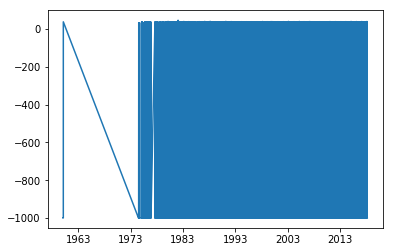

In [19]:
# plt.plot(lodwar_tmin['date'], lodwar_tmin['value'])
plt.plot(lodwar_tmax['date'], lodwar_tmax['value'])

In [20]:
def getobs(filename, obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    return data

In [21]:
lodwar_tmax = getobs('KE000063612.dly', 'TMAX')
lodwar_tmin = getobs('KE000063612.dly', 'TMIN')

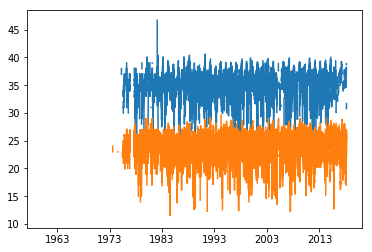

In [22]:
plt.plot(lodwar_tmax['date'], lodwar_tmax['value'])
plt.plot(lodwar_tmin['date'], lodwar_tmin['value'])

In [23]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan], 
                                   dates_float[~nan], 
                                   data['value'][~nan])

In [24]:
fillnans(lodwar_tmax)
fillnans(lodwar_tmin)

In [25]:
np.mean(lodwar_tmin['value']), np.mean(lodwar_tmax['value'])

(23.886651906338404, 35.42461549853291)

#### smoothen the data with running means

In [26]:
def plot_smothed(t, win=10):
    smothed = np.correlate(t['value'], np.ones(win)/win,'same')
    
    plt.plot(t['date'], smothed)
    

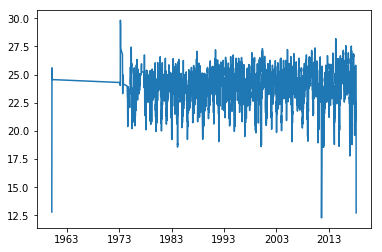

In [27]:
plot_smothed(lodwar_tmin)

> sample a smaller slice

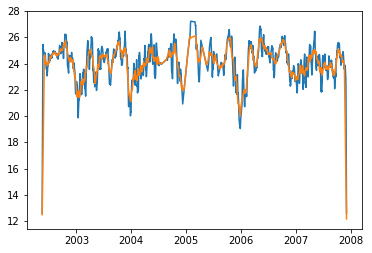

In [28]:
plot_smothed(lodwar_tmin[10000:12000])
plot_smothed(lodwar_tmin[10000:12000], 30)

#### plot all stations with smothing

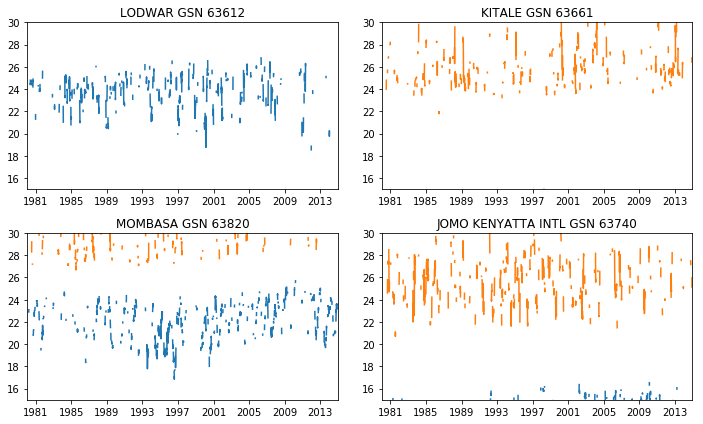

In [42]:
plt.figure(figsize=(10,6))

for i,code in enumerate(datastations):
    plt.subplot(2,2,i+1)
    
    plot_smothed(getobs('{}.dly'.format(code),'TMIN'))#, 10)
    plot_smothed(getobs('{}.dly'.format(code),'TMAX'))#, 10)
    
    plt.title(stations[code])
    plt.axis(xmin=np.datetime64('1980'),xmax=np.datetime64('2015'),ymin=15,ymax=30)

plt.tight_layout()